In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.ndimage

In [32]:
def timeseries_scale(data, scaled_length):
    """Scales a timeseries uniformly along the time axis.
    
    
    Parameters
    ----------
    data : numpy.array
        A single timeseries of a batch of timeseries. The first dimension
        of the numpy array corresponds to the time axis
        
    scaled_length : int
        The output length > 0 of the timeseries.
    """  
    
    time_scale = scaled_length / data.shape[0]
    
    zoom = None
    if len(data.shape) > 1:
        zoom = (time_scale,1)
    else:
        zoom = (time_scale,)
    
    return scipy.ndimage.zoom(data, zoom, mode='nearest')

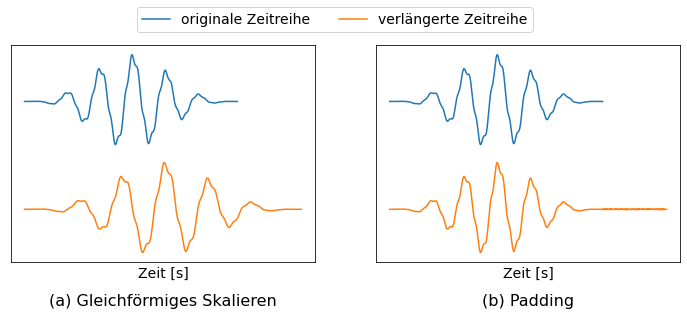

In [95]:
res = 1000
increment = 1.2
x1 = np.sin(np.linspace(0, np.pi, res)) ** 3
x2 = np.sin(np.linspace(0, 40, res))
x3 = np.cos(np.linspace(0, 200, res)) * 0.1 *x1
raw = np.reshape(x1*x2+x3, (res,-1))

normalizer = preprocessing.MinMaxScaler()
raw = normalizer.fit_transform(raw)
raw = np.reshape(raw, (res,))

out_res = int(res*1.3)
noise = np.random.normal(0, 0.002, out_res)
padded = np.ones((out_res,)) * raw[-1] + noise
padded[:res] = raw
scaled = timeseries_scale(raw, out_res)

raw += increment

fig, axs = plt.subplots(1,2, figsize= (12,4))

def plot_method(ax, long, annotation):
    ax.plot(raw, label='originale Zeitreihe')
    ax.plot(long, label='verlängerte Zeitreihe')
    ax.set_xlabel('Zeit [s]', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.5, -0.2, annotation, transform=ax.transAxes, size=16, horizontalalignment='center')

plot_method(axs[0], scaled, '(a) Gleichförmiges Skalieren')
plot_method(axs[1], padded, '(b) Padding')

handles, q = axs[0].get_legend_handles_labels()
fig.legend(handles, q, loc='lower center', bbox_to_anchor=(0.5,0.9), ncol=len(q), fontsize=14)
fig.savefig('timeseries_scaling.pdf', bbox_inches='tight')